In [1]:
#Please Run this file in '../src' directory

import os
import sys
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import numpy as np
import os
from matplotlib import pyplot as plt

## (Optional) Prepare a smaller dataset for your experiment

* python example: `tutorials/subsamples.py`
* api: `utils.data.subsampling`

In [2]:
from utils.data import subsampling
from utils.file import load_from_json

# load the configurations for the experiment
data_configs = load_from_json("../src/configs/demo/data-mnist.json")
output_root = "../results"
# print(data_configs.get('bs_file'))


# load the full-sized benign samples
file = os.path.join(data_configs.get('dir'), data_configs.get('bs_file'))
# print('getcwd:      ', os.getcwd())

# print(file)
# print(dir(file))
# print(data_configs.get('dir'))
# print(data_configs.get('label_file'))
X_bs = np.load(file)

# load the corresponding true labels
file = os.path.join(data_configs.get('dir'), data_configs.get('label_file'))
print(file)
labels = np.load(file)

# get random subsamples
# for MNIST, num_classes is 10
# files "subsamples-mnist-ratio_0.1-xxxxxx.npy" and "sublabels-mnist-ratio_0.1-xxxxxx.npy"
# will be generated and saved at "/results" folder, where "xxxxxx" are timestamps.
subsamples, sublabels = subsampling(data=X_bs,
                                    labels=labels,
                                    num_classes=10,
                                    filepath=output_root,
                                    filename='mnist')

Using TensorFlow backend.
C:\Users\hezek\.conda\envs\athena\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hezek\.conda\envs\athena\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hezek\.conda\envs\athena\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hezek\.conda\envs\athena\lib\site-packages\t

../data/test_Label-mnist-clean.npy


## Update the json file accordingly

1. Copy and paste the generated subsamples to the right place (i.e., defined by `"dir"` in `data-mnist.json`).
2. In the `data-mnist.json`, replace the value of `"bs_file"` with the `"subsamples-mnist-ratio_0.1-xxxxxx.npy"` and the value of `"label_file"` with the `"sublabels-mnist-ratio_0.1-xxxxxx.npy"`.

# Generate adversarial examples
We use `FGSM` as the example.
* python example: `tutorials/craft_adversarial_examples.py`
* main api: `attacks.attack.generate`
* check tunable parameters for each attack in file `attacks/attack.py`.

In [3]:
# copied from tutorials/craft_adversarial_examples.py
def generate_ae(model, data, labels, attack_configs, save=False, output_dir=None):
    """
    Generate adversarial examples
    :param model: WeakDefense. The targeted model.
    :param data: array. The benign samples to generate adversarial for.
    :param labels: array or list. The true labels.
    :param attack_configs: dictionary. Attacks and corresponding settings.
    :param save: boolean. True, if save the adversarial examples.
    :param output_dir: str or path. Location to save the adversarial examples.
        It cannot be None when save is True.
    :return:
    """
    img_rows, img_cols = data.shape[1], data.shape[2]
    num_attacks = attack_configs.get("num_attacks")
    data_loader = (data, labels)

    if len(labels.shape) > 1:
        labels = np.asarray([np.argmax(p) for p in labels])

    # generate attacks one by one
    for id in range(num_attacks):
        key = "configs{}".format(id)
        data_adv = generate(model=model,
                            data_loader=data_loader,
                            attack_args=attack_configs.get(key)
                            )
        # predict the adversarial examples
        predictions = model.predict(data_adv)
        predictions = np.asarray([np.argmax(p) for p in predictions])

        err = error_rate(y_pred=predictions, y_true=labels)
        print(">>> error rate:", err)

        # plotting some examples
        num_plotting = min(data.shape[0], 2)
        for i in range(num_plotting):
            img = data_adv[i].reshape((img_rows, img_cols))
            plt.imshow(img, cmap='gray')
            title = '{}: {}->{}'.format(attack_configs.get(key).get("description"),
                                        labels[i],
                                        predictions[i]
                                        )
            plt.title(title)
            plt.show()
            plt.close()

        # save the adversarial example
        if save:
            if output_dir is None:
                raise ValueError("Cannot save images to a none path.")
            # save with a random name
            file = os.path.join(output_dir, "{}.npy".format(attack_configs.get(key).get("description")))
#             file = os.path.join(output_dir, "{}.npy".format(time.monotonic()))
            print("Save the adversarial examples to file [{}].".format(file))
            np.save(file, data_adv)

>>> Loading model [../models/cnn/model-mnist-cnn-clean.h5]...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
>>> Generating FGSM examples.
>>> error rate: 0.143


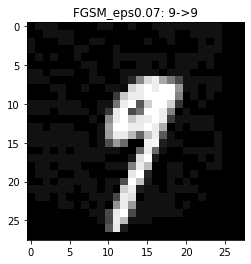

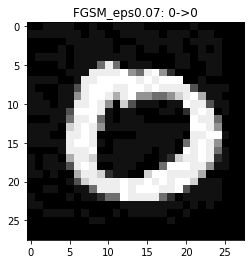

Save the adversarial examples to file [../generated\FGSM_eps0.07.npy].
>>> Generating FGSM examples.
>>> error rate: 0.257


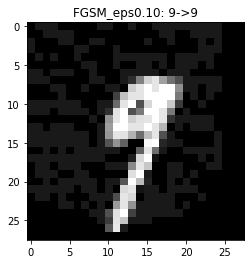

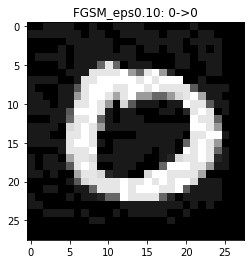

Save the adversarial examples to file [../generated\FGSM_eps0.10.npy].
>>> Generating FGSM examples.
>>> error rate: 0.534


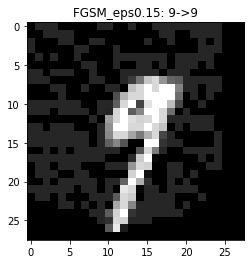

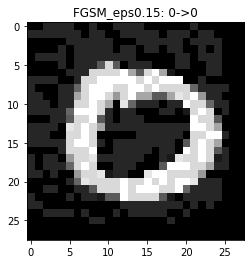

Save the adversarial examples to file [../generated\FGSM_eps0.15.npy].
>>> Generating FGSM examples.
>>> error rate: 0.739


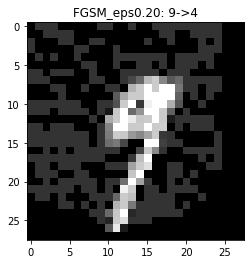

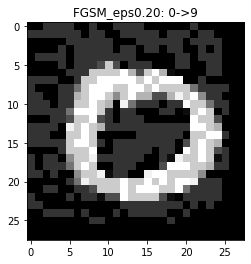

Save the adversarial examples to file [../generated\FGSM_eps0.20.npy].
>>> Generating FGSM examples.
>>> error rate: 0.846


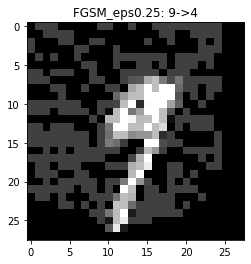

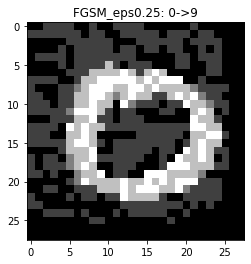

Save the adversarial examples to file [../generated\FGSM_eps0.25.npy].
>>> Generating FGSM examples.
>>> error rate: 0.898


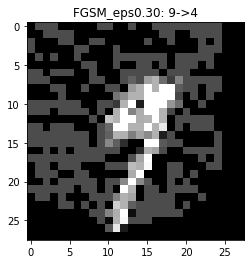

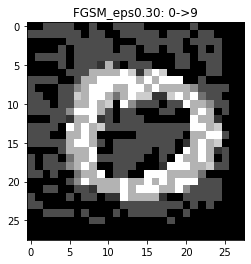

Save the adversarial examples to file [../generated\FGSM_eps0.30.npy].
>>> error rate: 0.29


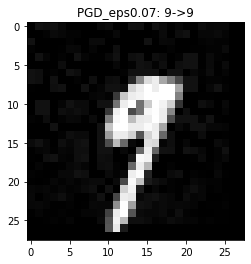

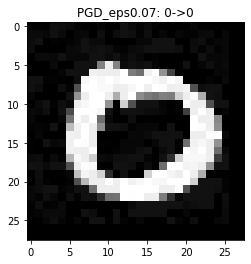

Save the adversarial examples to file [../generated\PGD_eps0.07.npy].
>>> error rate: 0.679


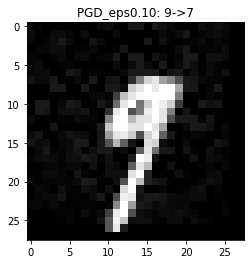

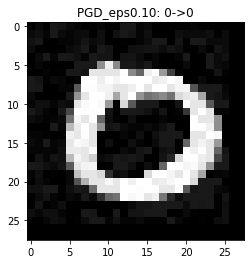

Save the adversarial examples to file [../generated\PGD_eps0.10.npy].
>>> error rate: 0.959


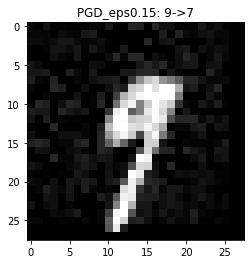

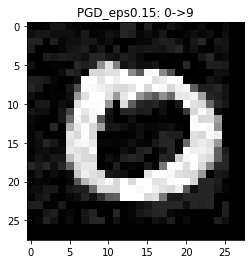

Save the adversarial examples to file [../generated\PGD_eps0.15.npy].
>>> error rate: 0.999


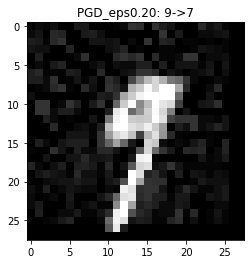

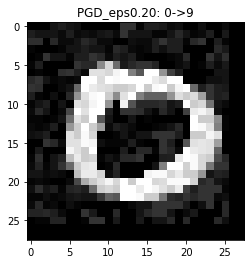

Save the adversarial examples to file [../generated\PGD_eps0.20.npy].
>>> error rate: 1.0


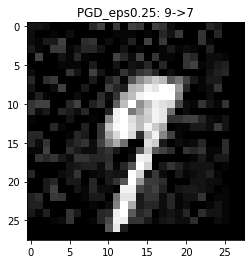

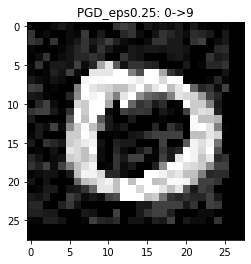

Save the adversarial examples to file [../generated\PGD_eps0.25.npy].
>>> error rate: 1.0


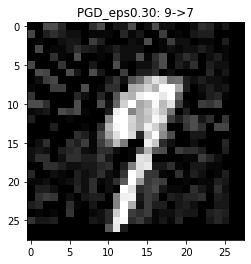

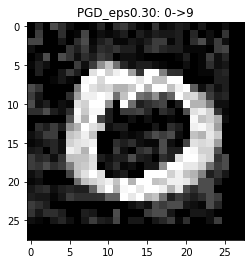

Save the adversarial examples to file [../generated\PGD_eps0.30.npy].
>>> error rate: 0.493


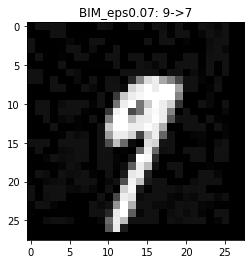

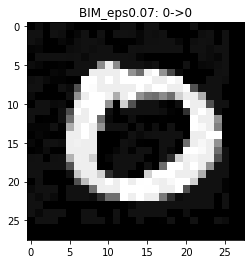

Save the adversarial examples to file [../generated\BIM_eps0.07.npy].
>>> error rate: 0.932


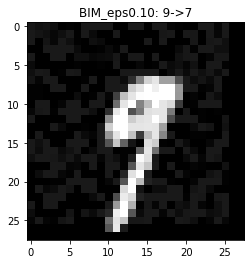

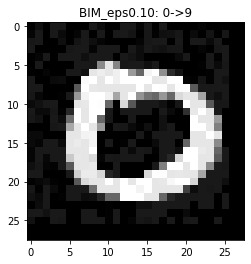

Save the adversarial examples to file [../generated\BIM_eps0.10.npy].
>>> error rate: 1.0


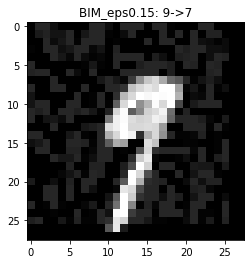

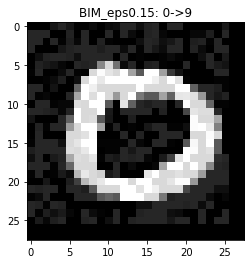

Save the adversarial examples to file [../generated\BIM_eps0.15.npy].
>>> error rate: 1.0


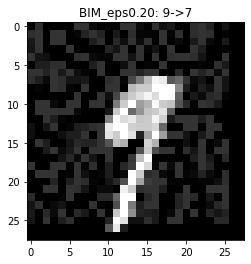

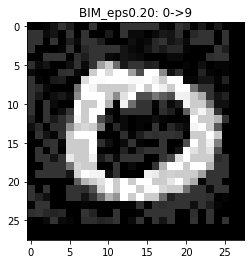

Save the adversarial examples to file [../generated\BIM_eps0.20.npy].
>>> error rate: 1.0


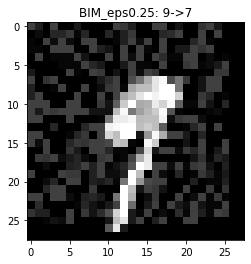

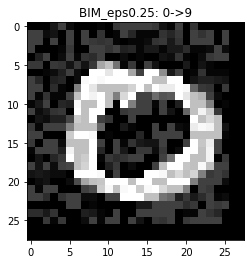

Save the adversarial examples to file [../generated\BIM_eps0.25.npy].
>>> error rate: 1.0


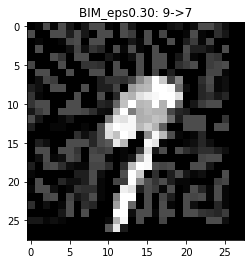

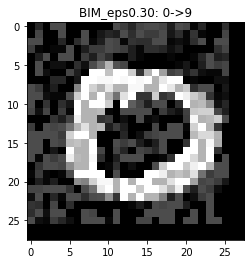

Save the adversarial examples to file [../generated\BIM_eps0.30.npy].


In [4]:
import time
from utils.model import load_lenet
from utils.metrics import error_rate
from attacks.attack import generate

# loading experiment configurations
model_configs = load_from_json("../src/configs/demo/model-mnist.json")
data_configs = load_from_json("../src/configs/demo/data-mnist.json")
attack_configs = load_from_json("../src/configs/demo/attack-zk-mnist.json")

# load the targeted model
model_file = os.path.join(model_configs.get("dir"), model_configs.get("um_file"))
target = load_lenet(file=model_file, wrap=True)

# load the benign samples

data_file = os.path.join(data_configs.get('dir'), data_configs.get('bs_file'))
data_bs = np.load(data_file)
# load the corresponding true labels
label_file = os.path.join(data_configs.get('dir'), data_configs.get('label_file'))
labels = np.load(label_file)

# generate AEs
# in this project, we generate AEs for all benign samples
data_bs = data_bs[:]
labels = labels[:]
# let save=True and specify an output folder to save the generated AEs
generate_ae(model=target, data=data_bs, labels=labels, attack_configs=attack_configs,save = True, output_dir = "../results")

## Update the generated adversarial examples in json

* Either add an item for the generated AEs. e.g., assume that we named the generated AE as `"fgsm_eps0.3.npy"`, then add the item as below example, then get your AE list by `data_configs.get("task1_aes")`.

```
"task1_aes" : [
                  "fgsm_eps0.3.npy"
              ]

```


2. Or, create a new json file similar to `"data-mnist.json"`, and replace the whole list for `"ae_files"` with your own list.

# Evaluate the generated AEs
* python example: `tutorials/eval_model.py`
* api: `utils.metrics.error_rate`

In [5]:
from utils.model import load_pool
from utils.metrics import error_rate, get_corrections
from models.athena import Ensemble, ENSEMBLE_STRATEGY

# copied from tutorials/eval_model.py
def evaluate(trans_configs, model_configs,
             data_configs, save=False, output_dir=None):
    """
    Apply transformation(s) on images.
    :param trans_configs: dictionary. The collection of the parameterized transformations to test.
        in the form of
        { configsx: {
            param: value,
            }
        }
        The key of a configuration is 'configs'x, where 'x' is the id of corresponding weak defense.
    :param model_configs:  dictionary. Defines model related information.
        Such as, location, the undefended model, the file format, etc.
    :param data_configs: dictionary. Defines data related information.
        Such as, location, the file for the true labels, the file for the benign samples,
        the files for the adversarial examples, etc.
    :param save: boolean. Save the transformed sample or not.
    :param output_dir: path or str. The location to store the transformed samples.
        It cannot be None when save is True.
    :return:
    """
    # Load the baseline defense (PGD-ADT model)
    baseline = load_lenet(file=model_configs.get('pgd_trained'), trans_configs=None,
                                  use_logits=False, wrap=False)

    # get the undefended model (UM)
    file = os.path.join(model_configs.get('dir'), model_configs.get('um_file'))
    undefended = load_lenet(file=file,
                            trans_configs=trans_configs.get('configs0'),
                            wrap=True)
    print(">>> um:", type(undefended))

    # load weak defenses into a pool
    pool, _ = load_pool(trans_configs=trans_configs,
                        model_configs=model_configs,
                        active_list=True,
                        wrap=True)
    # create an AVEP ensemble from the WD pool
    wds = list(pool.values())
    print(">>> wds:", type(wds), type(wds[0]))
    ensemble = Ensemble(classifiers=wds, strategy=ENSEMBLE_STRATEGY.AVEP.value)

    # load the benign samples
    bs_file = os.path.join(data_configs.get('dir'), data_configs.get('bs_file'))
    x_bs = np.load(bs_file)
    img_rows, img_cols = x_bs.shape[1], x_bs.shape[2]

    # load the corresponding true labels
    label_file = os.path.join(data_configs.get('dir'), data_configs.get('label_file'))
    labels = np.load(label_file)

    # get indices of benign samples that are correctly classified by the targeted model
    print(">>> Evaluating UM on [{}], it may take a while...".format(bs_file))
    pred_bs = undefended.predict(x_bs)
    corrections = get_corrections(y_pred=pred_bs, y_true=labels)

    # Evaluate AEs.
    results = {}
    eval_result = {}
#     ae_list = data_configs.get('ae_files')
    ae_list = data_configs.get('task1_aes')
    
    for i in ae_list:
        ae_file = os.path.join(data_configs.get('dir'), i)
#         print(type(ae_file))
#         print(ae_file)
        #print(ae_list[4])
        x_adv = np.load(ae_file)

        # evaluate the undefended model on the AE
        print(">>> Evaluating UM on [{}], it may take a while...".format(ae_file))
        pred_adv_um = undefended.predict(x_adv)
        err_um = error_rate(y_pred=pred_adv_um, y_true=labels, correct_on_bs=corrections)
        # track the result
        results['UM'] = err_um
        if 'UM' not in eval_result:
            eval_result['UM'] = [err_um]
        else:
            eval_result['UM'].append(err_um)

        # evaluate the ensemble on the AE
        print(">>> Evaluating ensemble on [{}], it may take a while...".format(ae_file))
        pred_adv_ens = ensemble.predict(x_adv)
        err_ens = error_rate(y_pred=pred_adv_ens, y_true=labels, correct_on_bs=corrections)
        # track the result
        results['Ensemble'] = err_ens
        if 'Ensemble' not in eval_result:
            eval_result['Ensemble'] = [err_ens]
        else:
            eval_result['Ensemble'].append(err_ens)

        # evaluate the baseline on the AE
        print(">>> Evaluating baseline model on [{}], it may take a while...".format(ae_file))
        pred_adv_bl = baseline.predict(x_adv)
        err_bl = error_rate(y_pred=pred_adv_bl, y_true=labels, correct_on_bs=corrections)
        # track the result
        results['PGD-ADT'] = err_bl
        if 'PGD-ADT' not in eval_result:
            eval_result['PGD-ADT'] = [err_bl]
        else:
            eval_result['PGD-ADT'].append(err_bl)

        # TODO: collect and dump the evaluation results to file(s) such that you can analyze them later.
        print(">>> Evaluations on [{}]:\n{}".format(ae_file, results))
    print(eval_result)
    return eval_result


In [6]:
# load experiment configurations
trans_configs = load_from_json("../src/configs/demo/athena-mnist.json")
model_configs = load_from_json("../src/configs/demo/model-mnist.json")
data_configs = load_from_json("../src/configs/demo/data-mnist.json")

output_root = "../results"

# evaluate
eval_result = evaluate(trans_configs=trans_configs,
         model_configs=model_configs,
         data_configs=data_configs,
         save=True,
         output_dir=output_root)

>>> Loading model [../models/baseline/advTrained-mnist-adtC.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-clean.h5]...
>>> um: <class 'models.keras.WeakDefense'>
>>> Loading model [../models/cnn/model-mnist-cnn-flip_horizontal.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-affine_both_stretch.h5]...
>>> Loading model [../models/cnn/model-mnist-cnn-morph_gradient.h5]...
>>> Loaded 3 models.
>>> wds: <class 'list'> <class 'models.keras.WeakDefense'>
>>> Evaluating UM on [../data/subsamples-mnist-ratio_0.1-3357.156.npy], it may take a while...
>>> Evaluating UM on [../data/FGSM_eps0.07.npy], it may take a while...
>>> Evaluating ensemble on [../data/FGSM_eps0.07.npy], it may take a while...
>>> Evaluating baseline model on [../data/FGSM_eps0.07.npy], it may take a while...
>>> Evaluations on [../data/FGSM_eps0.07.npy]:
{'UM': 0.13157894736842105, 'Ensemble': 0.00708502024291498, 'PGD-ADT': 0.015182186234817813}
>>> Evaluating UM on [../data/FGSM_eps0.10.npy], it may tak

[0.13157894736842105, 0.24493927125506074, 0.521255060728745, 0.7267206477732794, 0.832995951417004, 0.8866396761133604]
[0.00708502024291498, 0.012145748987854251, 0.032388663967611336, 0.09109311740890688, 0.3259109311740891, 0.6771255060728745]
[0.015182186234817813, 0.022267206477732792, 0.043522267206477734, 0.07692307692307693, 0.1214574898785425, 0.21963562753036436]
[0.2783400809716599, 0.667004048582996, 0.9463562753036437, 0.9868421052631579, 0.9878542510121457, 0.9878542510121457]
[0.009109311740890687, 0.013157894736842105, 0.0354251012145749, 0.0708502024291498, 0.14979757085020243, 0.30465587044534415]
[0.016194331983805668, 0.02327935222672065, 0.05060728744939271, 0.06983805668016195, 0.11639676113360324, 0.1811740890688259]
[0.4797570850202429, 0.9200404858299596, 0.9878542510121457, 0.9878542510121457, 0.9878542510121457, 0.9878542510121457]
[0.010121457489878543, 0.015182186234817813, 0.05060728744939271, 0.1508097165991903, 0.37955465587044535, 0.6477732793522267]
[

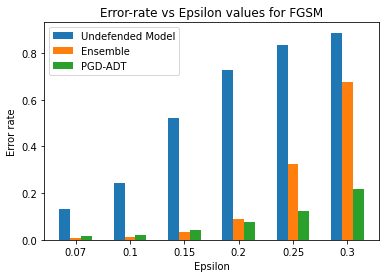

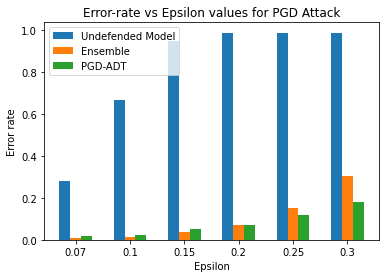

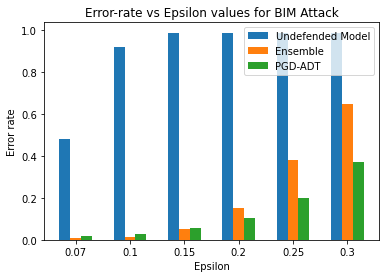

In [7]:
import matplotlib.pyplot as plt
import numpy as np


FGSM_err = {}
PGD_err = {}
BIM_err = {}
#for FGSM
FGSM_err['UM'] = eval_result['UM'][:6]
FGSM_err['Ensemble'] = eval_result['Ensemble'][:6]
FGSM_err['PGD-ADT'] = eval_result['PGD-ADT'][:6]
print(FGSM_err['UM'])
print(FGSM_err['Ensemble'])
print(FGSM_err['PGD-ADT'])

# for PGD
PGD_err['UM'] = eval_result['UM'][6:12]
PGD_err['Ensemble'] = eval_result['Ensemble'][6:12]
PGD_err['PGD-ADT'] = eval_result['PGD-ADT'][6:12]
print(PGD_err['UM'])
print(PGD_err['Ensemble'])
print(PGD_err['PGD-ADT'])

# for BIM
BIM_err['UM'] = eval_result['UM'][12:]
BIM_err['Ensemble'] = eval_result['Ensemble'][12:]
BIM_err['PGD-ADT'] = eval_result['PGD-ADT'][12:]
print(BIM_err['UM'])
print(BIM_err['Ensemble'])
print(BIM_err['PGD-ADT'])

w = 0.2
x = [0.07, 0.10, 0.15, 0.20, 0.25, 0.30] #epsilon values for attack

# FGSM Plot
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, FGSM_err['UM'], w , label='Undefended Model')
plt.bar(bar2, FGSM_err['Ensemble'], w , label='Ensemble')
plt.bar(bar3, FGSM_err['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error-rate vs Epsilon values for FGSM')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

#For PGD Plot of Error rates
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, PGD_err['UM'], w , label='Undefended Model')
plt.bar(bar2, PGD_err['Ensemble'], w , label='Ensemble')
plt.bar(bar3, PGD_err['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error-rate vs Epsilon values for PGD Attack')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

#For BIM Plot of Error rates
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
bar3 = [i+2*w for i in bar1]
plt.bar(bar1, BIM_err['UM'], w , label='Undefended Model')
plt.bar(bar2, BIM_err['Ensemble'], w , label='Ensemble')
plt.bar(bar3, BIM_err['PGD-ADT'], w , label='PGD-ADT')

plt.xlabel('Epsilon')
plt.ylabel('Error rate')
plt.title('Error-rate vs Epsilon values for BIM Attack')
plt.xticks(bar1+w, x)
plt.legend()
plt.show()

# Group Name: Team Horus

Group Members (Git-hub Usernames):  
   1. Withana (Rasika) Jayarathna (Rasika-prog)
   2. Kaveh Shariati (kavehshariati)
   3. Joshua Ojih (ojihjo)
   4. Olajide Bamidele (42n8dzydoo)



### Attacks Used and Settings: FGSM, PGD and BIM
The following instances of Epsilon settings were used to generate Adversarial Examples for the three types of attacks done (listed above): 
   1. Epsilon 0.07
   2. Epsilon 0.10
   3. Epsilon 0.15
   4. Epsilon 0.20
   5. Epsilon 0.25
   6. Epsilon 0.30

Additionally, the following default settings were used to generate the PGD and BIM Adversarial Examples:
   1. Epsilon step (eps_step) = (0.1 * Epsilon)
   2. Maximum iteration = 100

# Members contribution:
All members contributed to the success of task1.

Rasika and Olajide contributed to tuning the codes and generating BIM Adversarial Examples. 
Joshua and Kaveh  contributed to tuning the codes to generate the FGSM and PGD Adversarial Examples

Plotting of Results was done by Olajide and all team members performed the analysis together.

## Debugging the Code (the evaluate function in eval_model.py)
Initially, the evaluate function only evaluates the error rate for just one instance of Adversarial Examples. 
This was debugged by iterating over all the instances of the Adversarial Examples (AEs) using a "for-loop".

All team members were involved in debugging the codes to calculate the error rate for each Adversarial Examples (AEs) generated.

# Analysis of Results

The 18 Adversarial Examples (AEs) generated were tested on the Athena model using the AVEP Ensemble strategy and the results were plotted above.

# Observations
1. At low values of Epsilon (for values of epsilon < 0.20), the undefended model has a large Error-rate. The Athena model performed better than the state-of-the-art PGD-ADT. The model recorded lesser error rate compared to both the undefended model and the PGD-ADT


2. At larger values of Epsilon (epsilon > 0.15), the Adversarial Examples were able to fool the Athena model and larger error rates were observed. However, the PGD-ADT performed better than the Athena model for these epsilon values. 